In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing dataset
df = pd.read_csv("../Datasets/placement.csv", index_col=0)

In [3]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.shape

(100, 3)

Steps :

0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

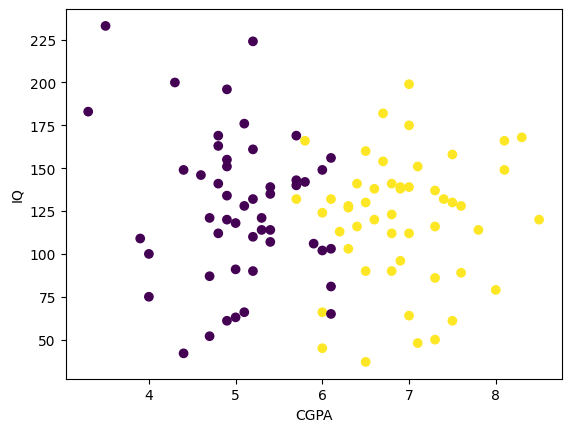

In [7]:
#scatter plot of cgpa vs iq
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [8]:
#Spliting the dataset into target and features
X = df.drop('placement', axis='columns')
y = df['placement']

In [9]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler

#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.71965379, -0.84104634],
       [-0.69993724,  0.88313913],
       [ 0.00985827, -0.54963471],
       [-0.25631505,  0.17889436],
       [ 0.09858271,  0.76171762],
       [ 0.89710266, -1.4724382 ],
       [-0.6112128 , -0.25822308],
       [ 0.18730715, -0.28250738],
       [-0.96611056,  1.73308971],
       [ 0.45348047,  0.85885483],
       [-0.69993724,  2.41305018],
       [-0.69993724, -0.84104634],
       [-0.25631505,  1.07741355],
       [-0.96611056, -0.11251727],
       [ 0.89710266,  1.22311936],
       [ 1.60689818, -0.25822308],
       [ 0.71965379, -0.03966436],
       [-0.96611056,  0.73743332],
       [ 0.00985827, -0.01538006],
       [ 1.34072486,  0.13032576],
       [ 1.16327598, -1.81241844],
       [ 0.89710266,  1.80594262],
       [-1.76463051, -1.20531088],
       [ 0.63092935,  0.71314901],
       [-0.96611056,  0.64029611],
       [-0.16759061,  0.42173738],
       [-1.85335495, -0.37964459],
       [ 0.63092935,  1.39310948],
       [ 0.36475603,

In [ ]:
#x_test scaling
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.4294493 ,  0.08175715],
       [-0.87738612, -0.81676204],
       [ 0.89710266,  0.34888448],
       [ 0.89710266, -0.30679169],
       [ 0.45348047, -0.84104634],
       [ 1.16327598, -0.93818355],
       [-0.87738612, -0.16108587],
       [ 0.27603159,  0.08175715],
       [-1.40973276,  0.5917275 ],
       [-1.76463051, -0.59820332]])

In [ ]:
from sklearn.linear_model import LogisticRegression

#training the model on logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
y_predicted = model.predict(X_test_scaled)
y_predicted #predicted values

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score

#accuracy score
accuracy_score(y_test, y_predicted)

1.0

<Axes: >

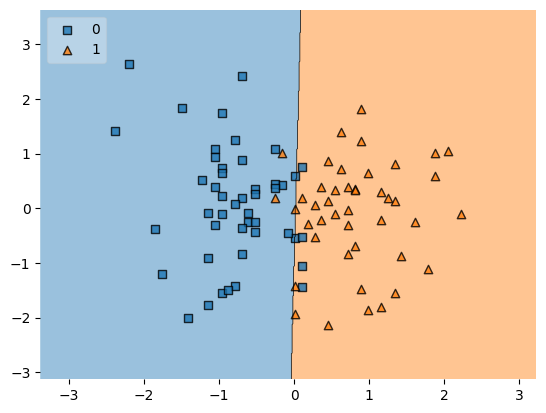

In [24]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_scaled, y_train.values, clf=model, legend=2)

In [25]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))